<a href="https://colab.research.google.com/github/parkjuyoung-hodo/127/blob/main/24_%ED%99%98%EA%B2%BD%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%B2%AD%EC%86%8Cand_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mc.csv')  ## 미기후 데이터 위치 지정
dataset = dataset.set_index(pd.to_datetime(dataset['date_time'])).drop(columns=['date_time'])

plt.rcParams['font.family'] = 'Malgun Gothic'  # 한글깨짐 방지(윈도우 기준)
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
from google.colab import drive  # 구글 드라이브랑 연결
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 1. 원본 파일 (???? 들어있는 파일)
src_path = "/content/drive/MyDrive/Colab Notebooks/24_환경정보.csv"

# ✅ 2. 첫 줄(????) 버리고 두 번째 줄을 컬럼명으로 사용
df = pd.read_csv(src_path, encoding="utf-8-sig", header=1)

# ✅ 3. 깨끗한 파일로 저장
clean_path = "/content/drive/MyDrive/Colab Notebooks/24_환경정보_clean.csv"
df.to_csv(clean_path, index=False, encoding="utf-8-sig")

clean_path = "/content/drive/MyDrive/Colab Notebooks/24_환경정보_clean.csv"
df.head()

,msrmt_dt,supplyEC,supplyPH,internalenvironment carbondioxide,internalenvironment humidity,internalenvironment temperature,externalenvironment insolation,externalenvironment temperature,externalenvironment winddirection,externalenvironment windspeed
0,2024-09-30 0:00,0.5,6.0,429,85.7,20.6,0,22.18,40,0.0
1,2024-09-30 1:00,0.5,6.0,430,85.9,20.6,0,22.24,39,0.0
2,2024-09-30 2:00,0.5,6.0,430,86.1,20.6,0,22.24,39,0.0
3,2024-09-30 3:00,0.5,6.0,438,91.2,22.0,0,21.60,50,0.0
4,2024-09-30 4:00,0.5,6.0,438,91.3,22.0,0,21.60,51,0.0


In [ ]:
import os

# 1. 원본 파일 경로 (구글 드라이브에 있는 24_생육정보.csv 위치)
src_path = "/content/drive/MyDrive/Colab Notebooks/24_생육정보.csv"


# 2. 첫 줄(깨진 헤더) 건너뛰고 두 번째 줄을 컬럼명으로 사용
df = pd.read_csv(src_path, encoding="utf-8-sig", header=1)


# 4. 지금 상황 기준 컬럼명 강제 정리
df.columns = [
    "block_id",
    "date",
    "bed_no",
    "plant_no",
    "info_type",
    "trait",
    "extra",
    "unit_kr_broken",
    "unit",
    "value"
]

# 5. 깨진 한글 들어있는 열(extra, unit_kr_broken) 삭제 → 여기서 ???? 사라짐
df_clean = df.drop(columns=["extra", "unit_kr_broken"])

# 6. unit 컬럼 안에 '??' 같은 것도 있으면 정리 (필요하면 유지/수정)
df_clean["unit"] = df_clean["unit"].replace("??", "")

# 7. 깨끗한 파일로 저장
clean_path = "/content/drive/MyDrive/Colab Notebooks/24_생육정보_clean.csv"
df_clean.to_csv(clean_path, index=False, encoding="utf-8-sig")


df_clean.head()


,block_id,date,bed_no,plant_no,info_type,trait,unit,value
0,1,2024-11-01,1,1,leafinfo,leaflength,cm,10.0
1,1,2024-11-01,1,1,leafinfo,leafwidth,cm,6.0
2,1,2024-11-01,1,1,leafinfo,petiolelength,cm,12.0
3,1,2024-11-01,1,1,leafinfo,leafnumber,,7.0
4,1,2024-11-01,1,1,steminfo,crowndiameter,cm,1.5


In [ ]:
import numpy as np
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/24_환경정보_clean.csv")

print(df.head())  #데이터 모양확인
print(df.info())  #컬럼 개수, 타입, 결측 여부 확인

          msrmt_dt  supplyEC  supplyPH  internalenvironment carbondioxide  \
0  2024-09-30 0:00       0.5       6.0                                429   
1  2024-09-30 1:00       0.5       6.0                                430   
2  2024-09-30 2:00       0.5       6.0                                430   
3  2024-09-30 3:00       0.5       6.0                                438   
4  2024-09-30 4:00       0.5       6.0                                438   

   internalenvironment humidity  internalenvironment temperature  \
0                          85.7                             20.6   
1                          85.9                             20.6   
2                          86.1                             20.6   
3                          91.2                             22.0   
4                          91.3                             22.0   

   externalenvironment insolation  externalenvironment temperature  \
0                               0                         

In [ ]:
df.dtypes #데이터 유형 알아보는 코드
#object 문자열로 저장 됨
#float64 실수형 숫자 데이터
#int64 정수형 숫자 데이터

,0
msrmt_dt,object
supplyEC,float64
supplyPH,float64
internalenvironment carbondioxide,int64
internalenvironment humidity,float64
internalenvironment temperature,float64
externalenvironment insolation,int64
externalenvironment temperature,float64
externalenvironment winddirection,int64
externalenvironment windspeed,float64


In [ ]:
#시계열 분석, 일출/일몰 구분, 시간별 패턴 보려면 datetime 타입 필수여서  datetime으로 바꿔줘야함!!
df['msrmt_dt'] = pd.to_datetime(df['msrmt_dt'])
df['hour'] = df['msrmt_dt'].dt.hour
df['date'] = df['msrmt_dt'].dt.date

df.head()

,msrmt_dt,supplyEC,supplyPH,internalenvironment carbondioxide,internalenvironment humidity,internalenvironment temperature,externalenvironment insolation,externalenvironment temperature,externalenvironment winddirection,externalenvironment windspeed,hour,date
0,2024-09-30 00:00:00,0.5,6.0,429,85.7,20.6,0,22.18,40,0.0,0,2024-09-30
1,2024-09-30 01:00:00,0.5,6.0,430,85.9,20.6,0,22.24,39,0.0,1,2024-09-30
2,2024-09-30 02:00:00,0.5,6.0,430,86.1,20.6,0,22.24,39,0.0,2,2024-09-30
3,2024-09-30 03:00:00,0.5,6.0,438,91.2,22.0,0,21.60,50,0.0,3,2024-09-30
4,2024-09-30 04:00:00,0.5,6.0,438,91.3,22.0,0,21.60,51,0.0,4,2024-09-30


In [ ]:
#파일에 결측치가 있는 지 확인하는 코드
# 진짜 NaN 개수 확인
print(df.isnull().sum())

# 특이값(예: 음수일 수 없는 값)에 대한 간단한 체크 예시
for col in ['supplyEC', 'supplyPH',
            'internalenvironment humidity',
            'internalenvironment temperature',
            'externalenvironment temperature',
            'externalenvironment insolation',
            'externalenvironment windspeed']:
    print(col, "min:", df[col].min(), "max:", df[col].max())


msrmt_dt                             0
supplyEC                             0
supplyPH                             0
internalenvironment carbondioxide    0
internalenvironment humidity         0
internalenvironment temperature      0
externalenvironment insolation       0
externalenvironment temperature      0
externalenvironment winddirection    0
externalenvironment windspeed        0
dtype: int64
supplyEC min: 0.5 max: 4.3
supplyPH min: 5.9 max: 6.8
internalenvironment humidity min: 10.2 max: 99.9
internalenvironment temperature min: 5.3 max: 30.1
externalenvironment temperature min: -5.39 max: 24.2
externalenvironment insolation min: 0 max: 809
externalenvironment windspeed min: 0.0 max: 5.7


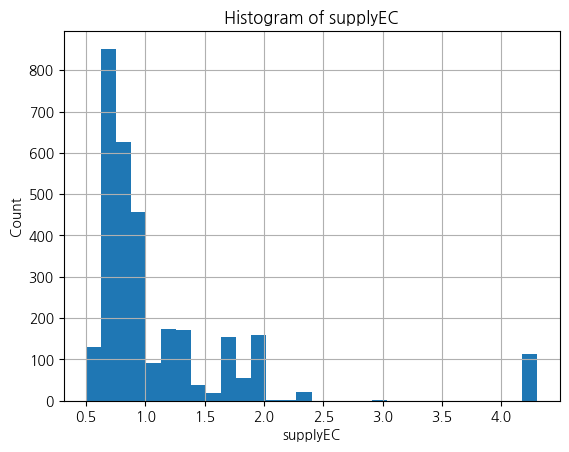

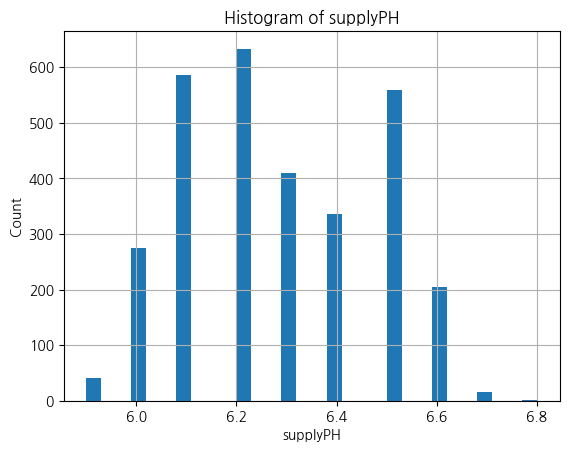

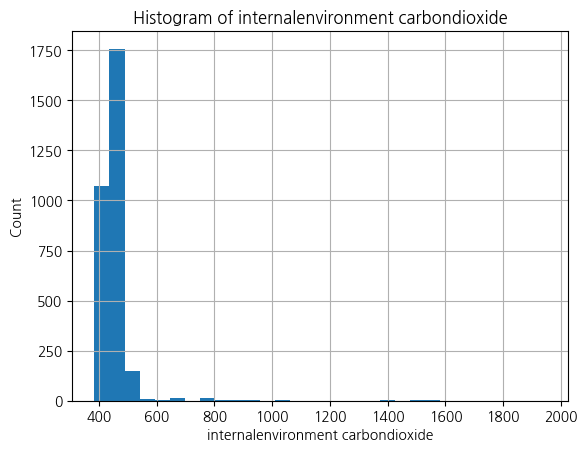

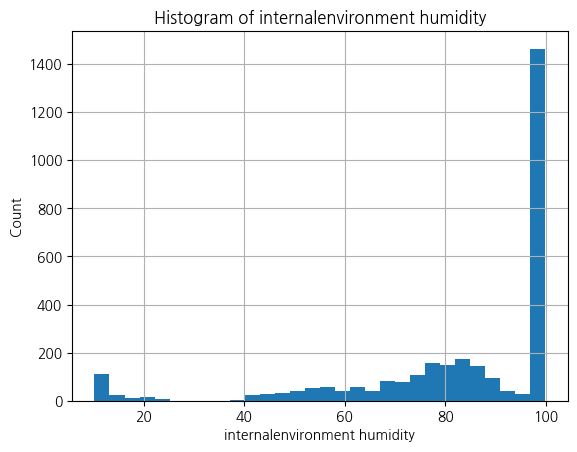

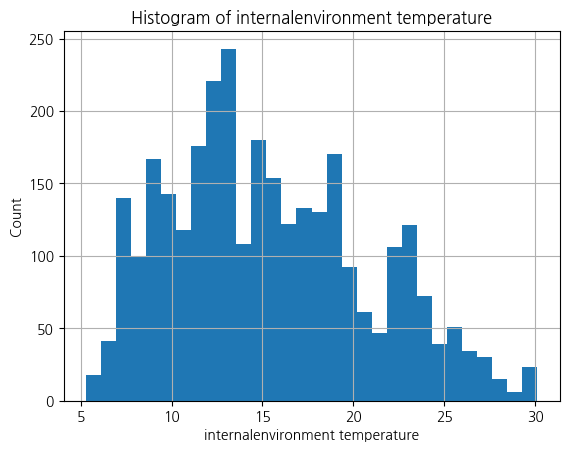

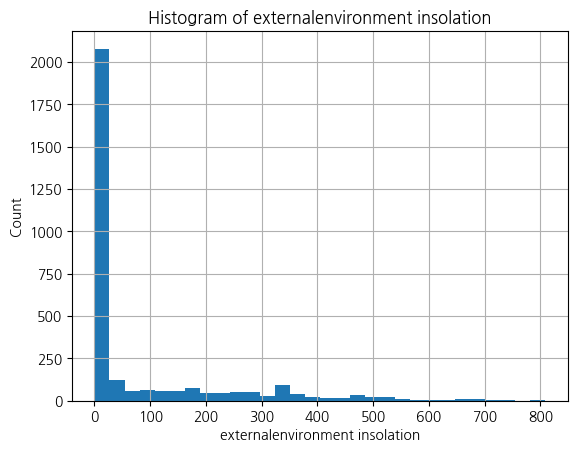

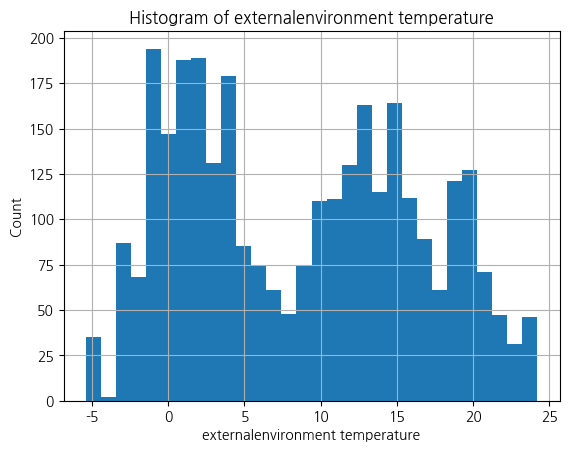

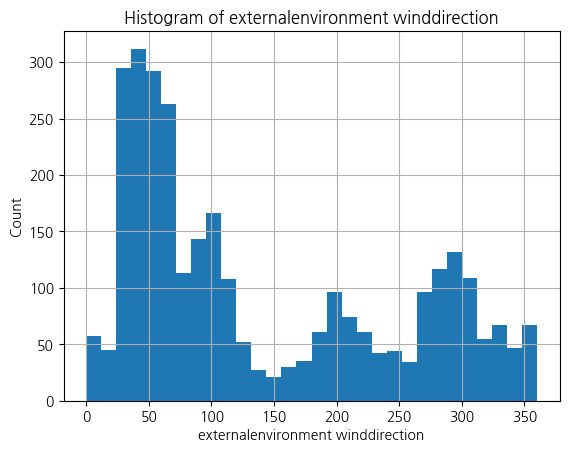

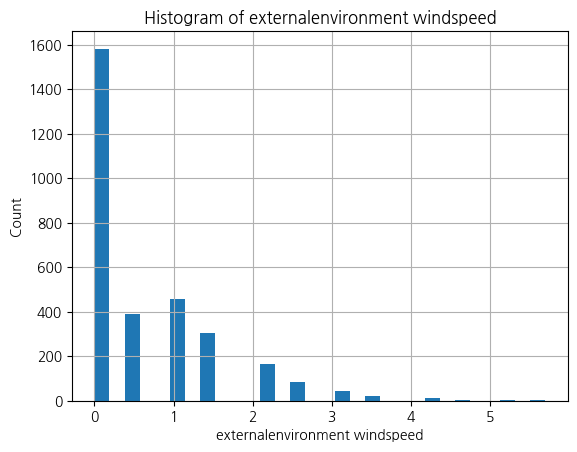

In [ ]:
num_cols = [
    'supplyEC', 'supplyPH',
    'internalenvironment carbondioxide',
    'internalenvironment humidity',
    'internalenvironment temperature',
    'externalenvironment insolation',
    'externalenvironment temperature',
    'externalenvironment winddirection',
    'externalenvironment windspeed'
]


for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


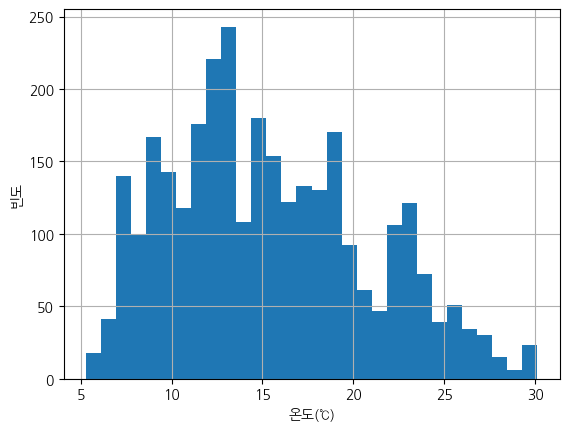

In [ ]:
# 코랩, 리눅스에 맑은 고딕 폰트가 없어서 생기는 오류 해결 ->한글 폰트 까는 코드
import matplotlib.font_manager as fm
import os # os 모듈을 임포트합니다.

# 1. 나눔고딕 파일 경로 (Colab 기본 설치 위치)
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

# 3. matplotlib 폰트 매니저에 직접 등록
if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    plt.rc('font', family='NanumGothic')  # 여기 family 이름 중요 (띄어쓰기 없음)
    plt.rcParams['axes.unicode_minus'] = False
else:
    # 혹시 경로가 다르면, 사용 가능한 폰트 목록 찍어보기
    import subprocess
    print(subprocess.check_output("fc-list :lang=ko", shell=True).decode("utf-8"))

    plt.title("내부 온도 분포")
plt.xlabel("온도(℃)")
plt.ylabel("빈도")
df['internalenvironment temperature'].hist(bins=30)
plt.show()

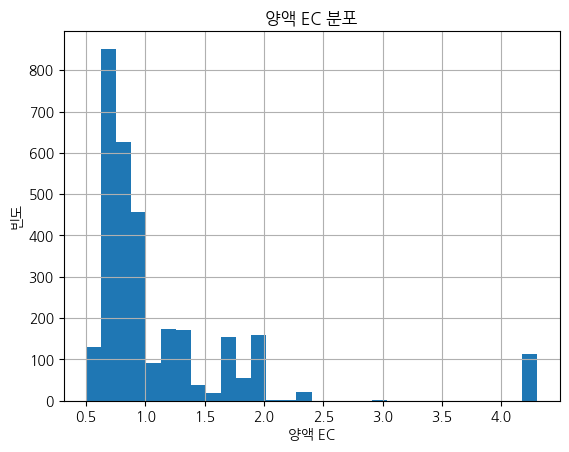

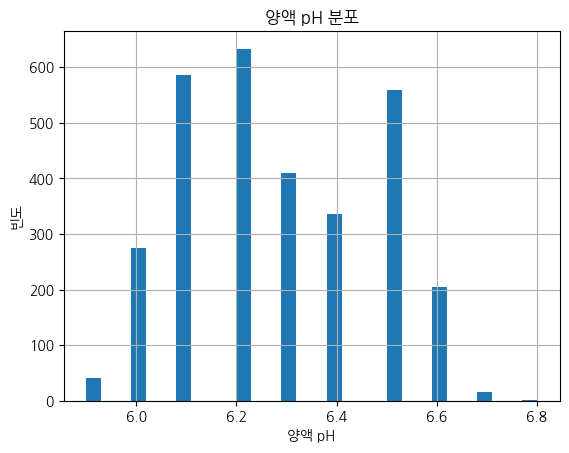

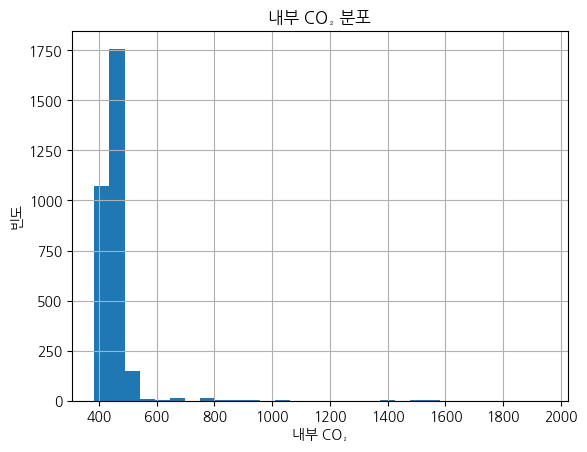

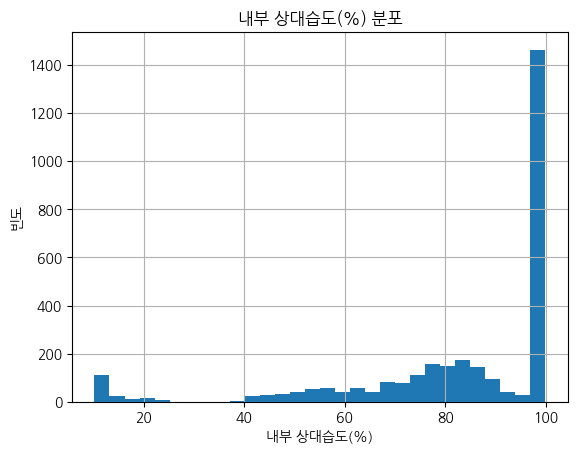

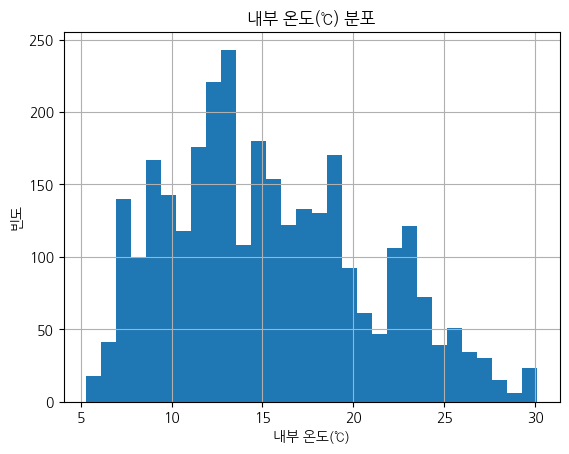

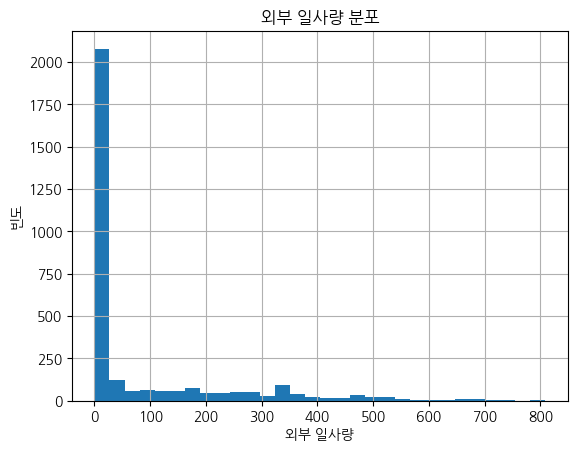

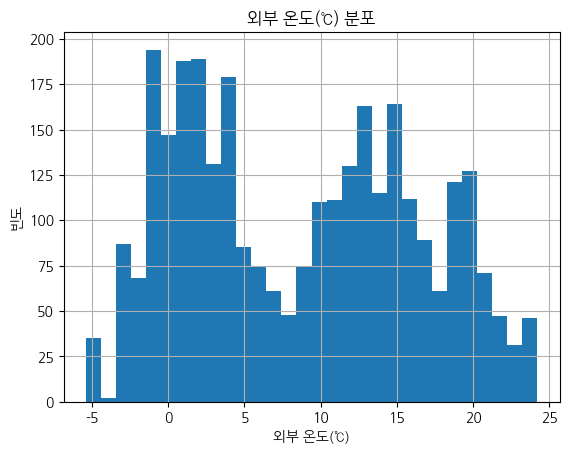

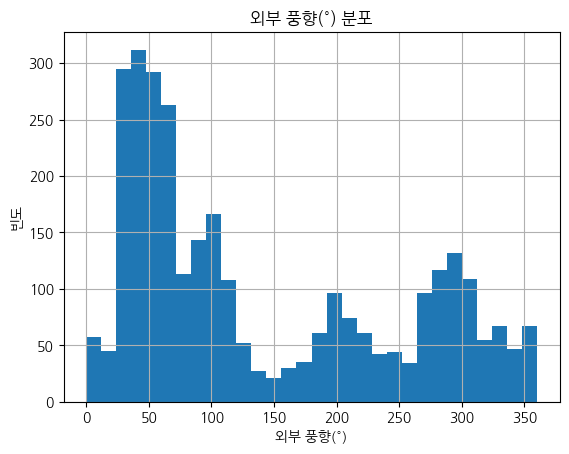

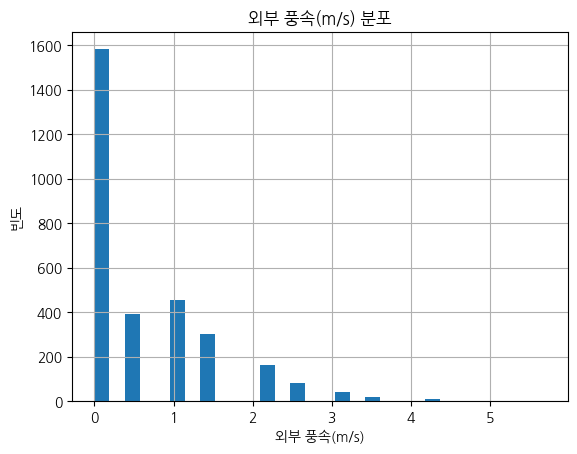

In [ ]:
#농업 종사자 분들은 연령대가 높으니까 한국어로 폰트를 또 크게는 못할려나...
num_cols = [
    'supplyEC', 'supplyPH',
    'internalenvironment carbondioxide',
    'internalenvironment humidity',
    'internalenvironment temperature',
    'externalenvironment insolation',
    'externalenvironment temperature',
    'externalenvironment winddirection',
    'externalenvironment windspeed'
]

col_labels = {
    'supplyEC': '양액 EC',
    'supplyPH': '양액 pH',
    'internalenvironment carbondioxide': '내부 CO₂',
    'internalenvironment humidity': '내부 상대습도(%)',
    'internalenvironment temperature': '내부 온도(℃)',
    'externalenvironment insolation': '외부 일사량',
    'externalenvironment temperature': '외부 온도(℃)',
    'externalenvironment winddirection': '외부 풍향(°)',
    'externalenvironment windspeed': '외부 풍속(m/s)'
}

for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)

    label = col_labels.get(col, col)  # 혹시 dict에 없으면 원래 이름 사용
    plt.title(f'{label} 분포')
    plt.xlabel(label)
    plt.ylabel('빈도')

    plt.show()



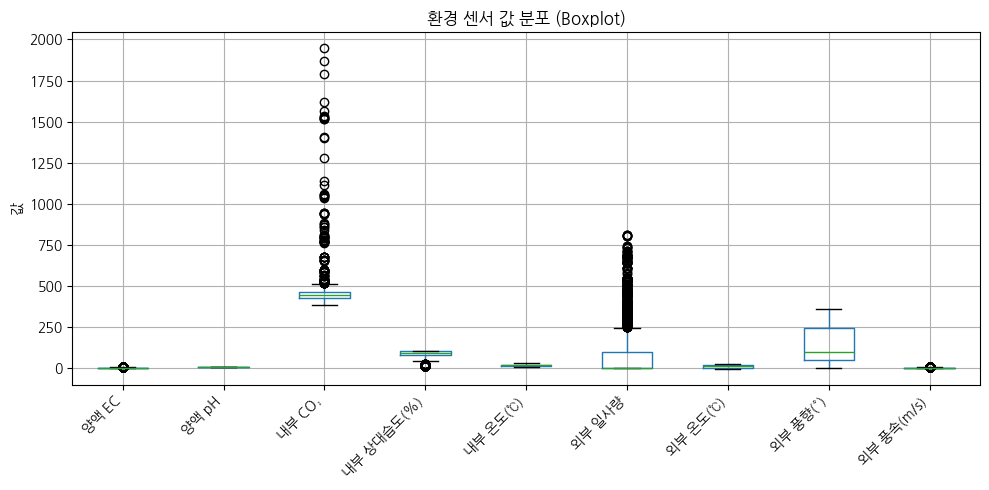

In [ ]:
plt.figure(figsize=(10,5)) # 그래프 크기

ax= df[num_cols].boxplot(rot=45)

# x축 눈금라벨을 한국어로 교체
ax.set_xticklabels([col_labels[c] for c in num_cols], rotation=45, ha='right')

plt.title('환경 센서 값 분포 (Boxplot)')
plt.ylabel('값')
plt.tight_layout()
plt.show()

In [ ]:
# 위에 있는 분포도롤 해석한 것 iqr 분석
def detect_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return lower, upper

for col in num_cols:
    lower, upper = detect_outliers_iqr(df[col])
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    print(f"{col}: IQR 기준 하한={lower:.3f}, 상한={upper:.3f}, 이상치 개수={outlier_count}")

#위에가 box로  이상치 개수가 많아 보임

supplyEC: IQR 기준 하한=-0.050, 상한=1.950, 이상치 개수=153
supplyPH: IQR 기준 하한=5.500, 상한=7.100, 이상치 개수=0
internalenvironment carbondioxide: IQR 기준 하한=374.500, 상한=514.500, 이상치 개수=122
internalenvironment humidity: IQR 기준 하한=37.900, 상한=137.100, 이상치 개수=168
internalenvironment temperature: IQR 기준 하한=-0.160, 상한=30.400, 이상치 개수=0
externalenvironment insolation: IQR 기준 하한=-147.000, 상한=245.000, 이상치 개수=457
externalenvironment temperature: IQR 기준 하한=-18.130, 상한=34.910, 이상치 개수=0
externalenvironment winddirection: IQR 기준 하한=-239.000, 상한=529.000, 이상치 개수=0
externalenvironment windspeed: IQR 기준 하한=-1.500, 상한=2.500, 이상치 개수=162


In [ ]:
# 1) msrmt_dt를 datetime 형식으로 변환
df['msrmt_dt'] = pd.to_datetime(df['msrmt_dt'])

# 2) hour 컬럼 만들기 (0~23시)
df['hour'] = df['msrmt_dt'].dt.hour

# (선택) 날짜만 따로 쓰고 싶으면
df['date'] = df['msrmt_dt'].dt.date

# 3) 주/야간 구분 함수
def day_or_night(h):
    return 'day' if 6 <= h < 18 else 'night'

# 4) 주/야간 컬럼 생성
df['day_night_simple'] = df['hour'].apply(day_or_night)

# 5) 결과 확인
print(df[['msrmt_dt', 'hour', 'day_night_simple']].head())


             msrmt_dt  hour day_night_simple
0 2024-09-30 00:00:00     0            night
1 2024-09-30 01:00:00     1            night
2 2024-09-30 02:00:00     2            night
3 2024-09-30 03:00:00     3            night
4 2024-09-30 04:00:00     4            night


In [ ]:
df['day_night_simple'].value_counts()

,count
day_night_simple,
day,1536
night,1525
